In [ ]:
from scripts.news_analysis import *

Descriptive Statistics:

In [ ]:
# File paths
file_path = '../data/raw_analyst_ratings.csv.zip'
output_path = '../data/processed_analyst_ratings.csv'
# Load data
df = load_data(file_path)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
# Add headline length
df = add_headline_length(df)
print(df[['headline', 'headline_length']].head())

,headline
0,39
1,42
2,29
3,44
4,87


In [ ]:
# Publisher count
publisher_counts = publisher_count(df)
print(publisher_counts.head())

,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380


In [ ]:
# Parse dates
df = parse_dates(df)
print(df['date'].head())

,date
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT


Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
# Analyze sentiment
df = analyze_sentiment(df)
print(df[['headline', 'sentiment']].head())

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,0.0


In [ ]:
# Extract keywords
df = extract_keywords(df)
print(df[['headline', 'keywords']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,keywords
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,0.0,"[Stocks, That, Hit, 52-Week, Highs, On, Friday]"
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,0.0,"[Stocks, That, Hit, 52-Week, Highs, On, Wednes..."
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,0.0,"[71, Biggest, Movers, From, Friday]"
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,0.0,"[46, Stocks, Moving, In, Friday, 's, Mid-Day, ..."
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,0.0,"[B, of, A, Securities, Maintains, Neutral, on,..."


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['headline_length'].plot(kind='hist', bins=20, title='headline_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('headline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('url').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('publisher').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Unnamed: 0', y='headline_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['headline_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('headline')):
  _plot_series(series, series_name, i)
  fig.legend(title='headline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('headline_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['headline_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('url')):
  _plot_series(series, series_name, i)
  fig.legend(title='url', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('headline_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['headline_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('publisher')):
  _plot_series(series, series_name, i)
  fig.legend(title='publisher', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('headline_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('headline')):
  _plot_series(series, series_name, i)
  fig.legend(title='headline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['headline_length'].plot(kind='line', figsize=(8, 4), title='headline_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['url'].value_counts()
    for x_label, grp in _df_12.groupby('headline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('headline')
_ = plt.ylabel('url')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['publisher'].value_counts()
    for x_label, grp in _df_13.groupby('url')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('url')
_ = plt.ylabel('publisher')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['headline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Unnamed: 0', y='headline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['url'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Unnamed: 0', y='url', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['publisher'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Unnamed: 0', y='publisher', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['headline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='headline_length', y='headline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Time Series Analysis

In [ ]:
# Set date as index
df = set_date_index(df)

In [ ]:
# Analyze time features
df = analyze_time_features(df)

Visuallize with plot

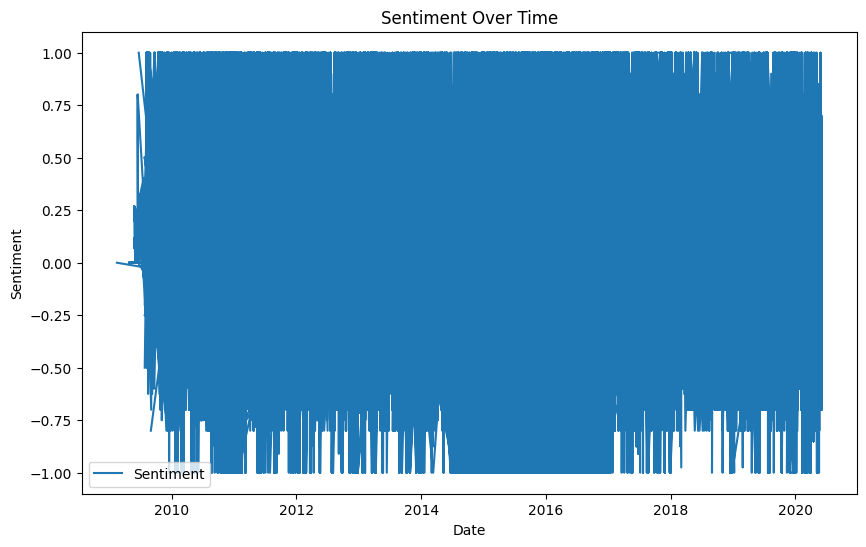

In [ ]:
#Plot sentiment
plot_sentiment(df)

In [ ]:
#  Save processed data
save_processed_data(df, output_path)
print(f"Processed data saved to {output_path}")